[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
442 10
(442,)


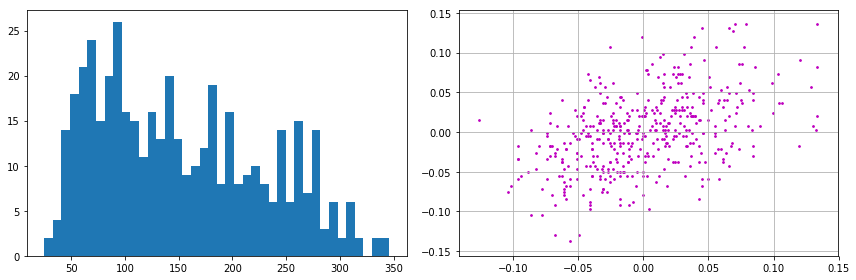

In [1]:
%matplotlib inline
import math
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
print(X)
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,8], X[:,9], c='m', s=3)
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


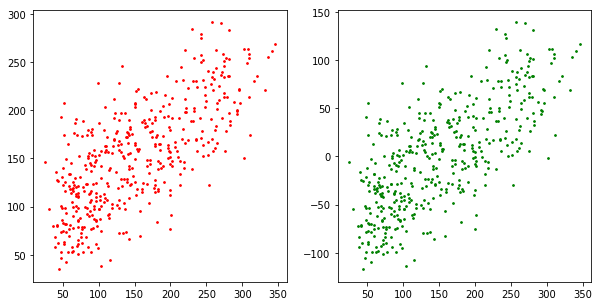

In [2]:
# Linear regression using sklearn
#
lin = LinearRegression(fit_intercept=True)
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
print(w)
th2 = X @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='r', s=3)
ax[1].scatter(t, th2, c='g', s=3)

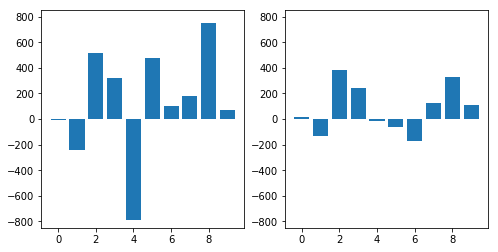

In [3]:
gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].set_ylim(-850,850)
ax[1].set_ylim(-850,850)
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)


plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

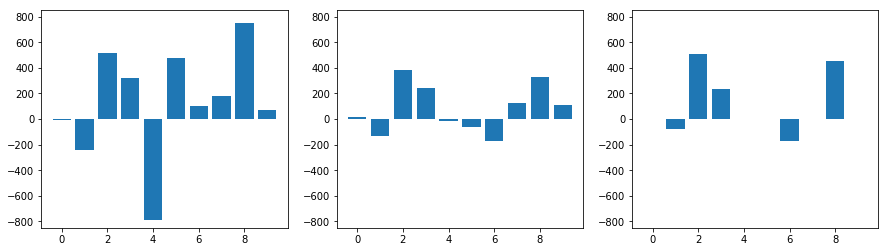

In [4]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)
wL = np.linalg.inv(X.T @ X) @ X.T @ th_lasso
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].set_ylim(-850,850)
ax[1].set_ylim(-850,850)
ax[2].set_ylim(-850,850)
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)
ax[2].bar(np.arange(len(wL)),wL)
#
#...
#
plt.savefig("solutions.png")